                                   Week1 Data Processing                    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns      

In [2]:
df=pd.read_csv("earthquake_alert_balanced_dataset.csv")
print("--------dataframe--------\n")
print(df)
print(df.head())
print(df.shape)


--------dataframe--------

      magnitude  depth  cdi  mmi    sig   alert
0          7.00   14.0  8.0  7.0    0.0   green
1          6.90   25.0  4.0  4.0  -33.0   green
2          7.00  579.0  3.0  3.0  -13.0   green
3          7.30   37.0  5.0  5.0   65.0   green
4          6.60  624.0  0.0  2.0  -98.0   green
...         ...    ...  ...  ...    ...     ...
1295       6.87   11.0  9.0  7.0   13.0  yellow
1296       7.85   93.0  8.0  6.0  -51.0  yellow
1297       7.48  142.0  7.0  6.0  120.0  yellow
1298       7.04   51.0  7.0  6.0 -115.0  yellow
1299       6.50    9.0  9.0  8.0  -29.0  yellow

[1300 rows x 6 columns]
   magnitude  depth  cdi  mmi   sig  alert
0        7.0   14.0  8.0  7.0   0.0  green
1        6.9   25.0  4.0  4.0 -33.0  green
2        7.0  579.0  3.0  3.0 -13.0  green
3        7.3   37.0  5.0  5.0  65.0  green
4        6.6  624.0  0.0  2.0 -98.0  green
(1300, 6)


In [3]:
print(df.info())
print("----missing values--\n")
print(df.isnull().sum())
print("\n----handling missing values--\n")
print(df.dropna())
print("\n---duplicated values---\n")
print(df.duplicated().sum())
print("\n--remove duplicate values---\n")
print(df.drop_duplicates())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB
None
----missing values--

magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64

----handling missing values--

      magnitude  depth  cdi  mmi    sig   alert
0          7.00   14.0  8.0  7.0    0.0   green
1          6.90   25.0  4.0  4.0  -33.0   green
2          7.00  579.0  3.0  3.0  -13.0   green
3          7.30   37.0  5.0  5.0   65.0   green
4          6.60  624.0  0.0  2.0  -98.0   green
...         ...    ...  ...  ...    ...     ...
1295       6.87   11.0 

In [4]:
print(df.describe())

         magnitude        depth          cdi          mmi          sig
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000
mean      7.061008    50.321538     6.976154     6.939231    -9.749231
std       0.423738   104.348286     2.244875     1.354774    62.245214
min       6.500000     2.000000     0.000000     1.000000  -128.000000
25%       6.700000    12.000000     6.000000     6.000000   -54.000000
50%       7.000000    19.000000     8.000000     7.000000    -7.000000
75%       7.300000    38.000000     8.000000     8.000000    31.000000
max       8.600000   670.000000     9.000000     9.000000   127.000000


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
df.to_csv("leaned_dataset.csv", index=False)


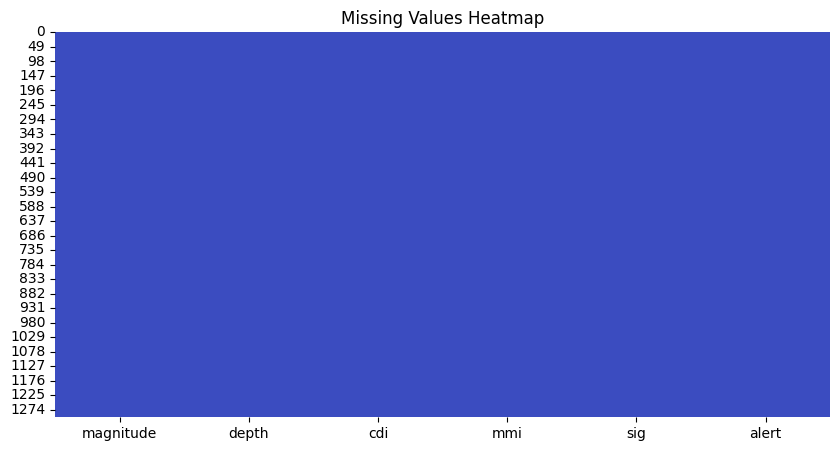

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

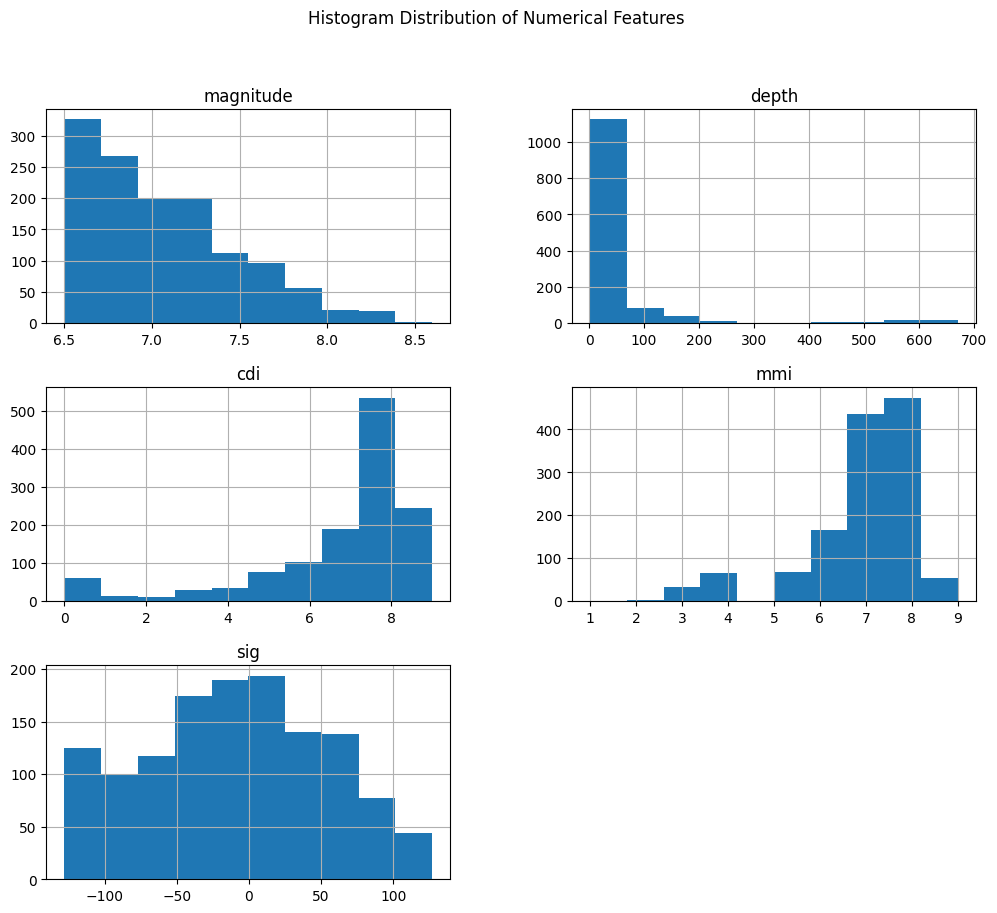

In [ ]:
df.hist(figsize=(12,10))
plt.suptitle("Histogram Distribution of Numerical Features")
plt.show()


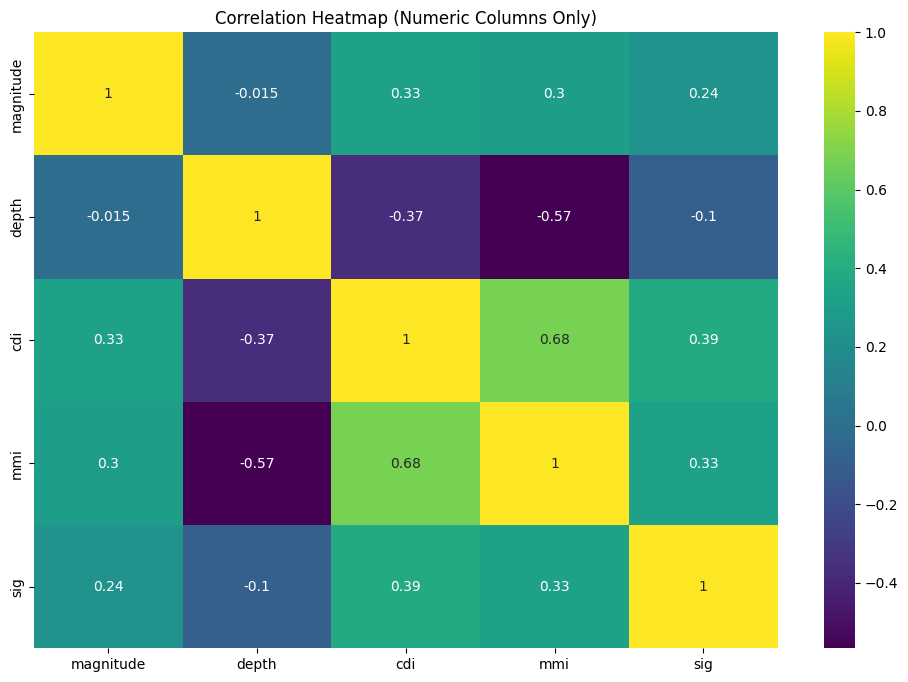

In [ ]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


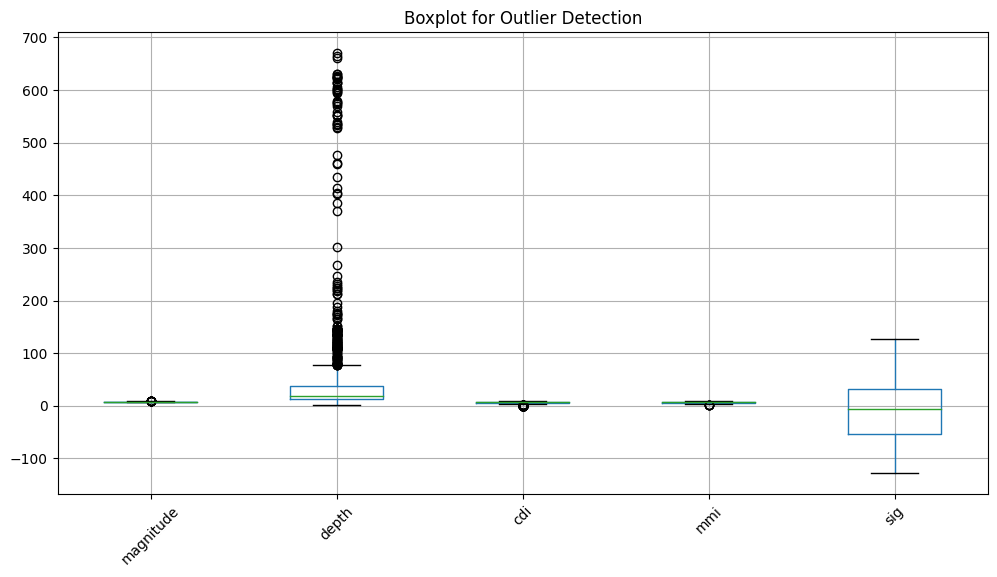

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


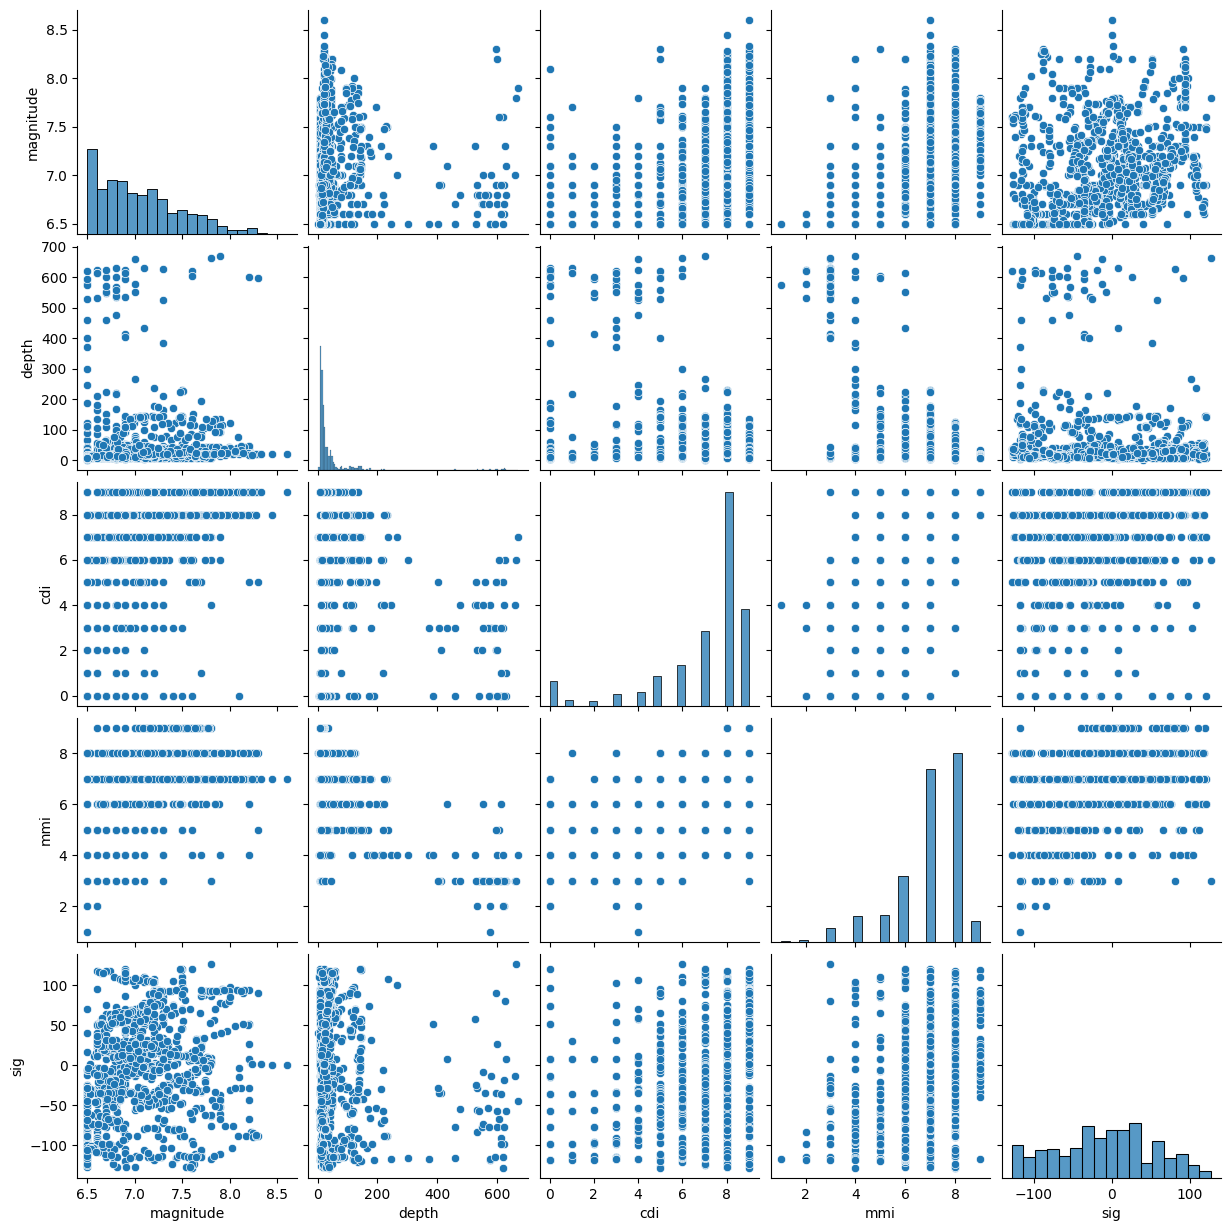

In [ ]:
sns.pairplot(df)
plt.show()
